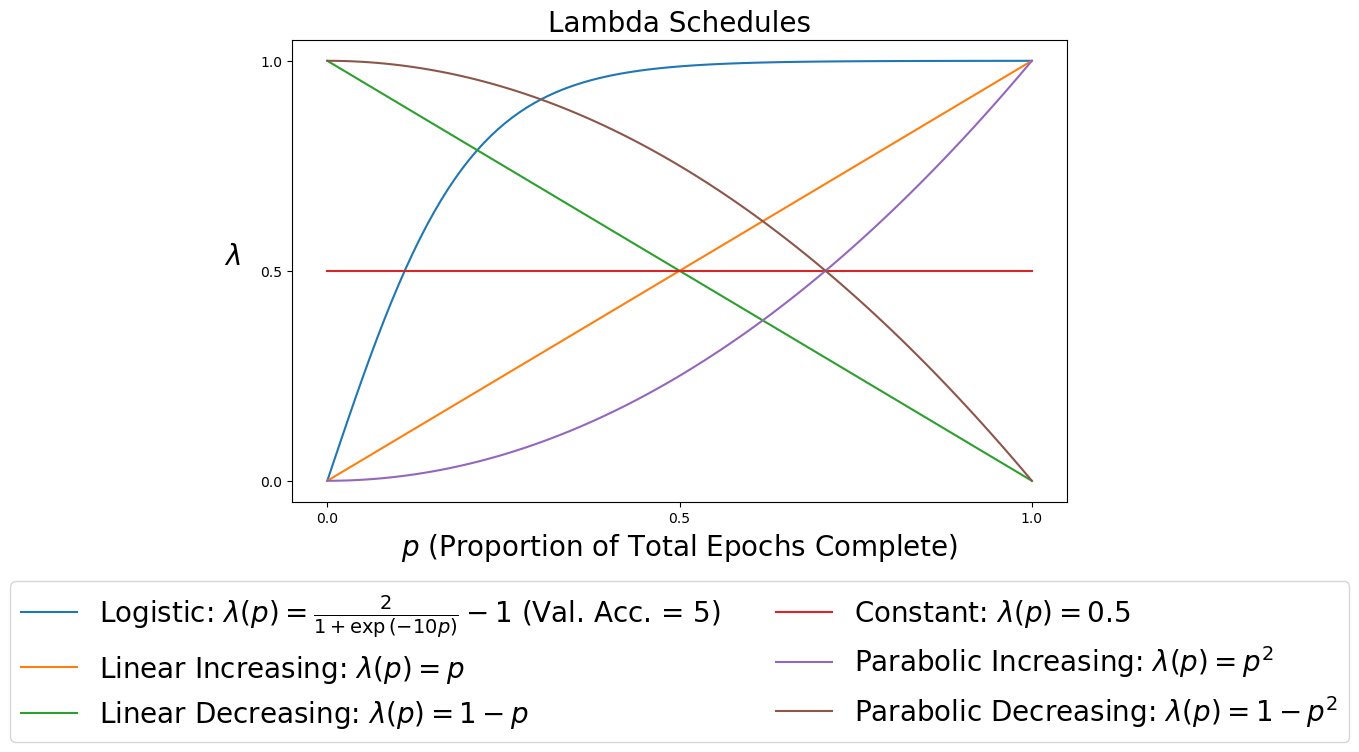

In [4]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def logistic_lambda_scheduler(epoch, total_epochs):
    return 2. / (1. + np.exp(-10 * (epoch / total_epochs))) - 1

def linear_increasing_lambda_scheduler(epoch, total_epochs):
    return epoch / total_epochs

def linear_decreasing_lambda_scheduler(epoch, total_epochs):
    return 1 - (epoch / total_epochs)

def constant_lambda_scheduler(epoch=None, total_epochs=None, lambda_value=0.5):
    return lambda_value

def parabolic_increasing_lambda_scheduler(epoch, total_epochs, start_value=0.0, end_value=1.0):
    progress = epoch / total_epochs
    return start_value + (end_value - start_value) * (progress ** 2)

def parabolic_decreasing_lambda_scheduler(epoch, total_epochs, start_value=0.0, end_value=1.0):
    progress = epoch / total_epochs
    return end_value - (end_value - start_value) * (progress ** 2)

NUM_EPOCHS = 1
epochs = np.linspace(0, NUM_EPOCHS, 100)
logistic = [logistic_lambda_scheduler(e, NUM_EPOCHS) for e in epochs]
linear_increasing = [linear_increasing_lambda_scheduler(e, NUM_EPOCHS) for e in epochs]
linear_decreasing = [linear_decreasing_lambda_scheduler(e, NUM_EPOCHS) for e in epochs]
constant = [constant_lambda_scheduler() for e in epochs]
parabolic_increasing = [parabolic_increasing_lambda_scheduler(e, NUM_EPOCHS) for e in epochs]
parabolic_decreasing = [parabolic_decreasing_lambda_scheduler(e, NUM_EPOCHS) for e in epochs]

# Validation accuracies taken from D20_Pipeline_clean.ipynb, epoch 50, branch 1 accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, logistic,
         label=r'Logistic: $\lambda(p)=\frac{2}{1+\exp{(-10p)}} - 1$')
plt.plot(epochs, linear_increasing,
         label=r'Linear Increasing: $\lambda(p)=p$')
plt.plot(epochs, linear_decreasing,
         label=r'Linear Decreasing: $\lambda(p)=1 - p$')
plt.plot(epochs, constant,
         label=r'Constant: $\lambda(p)=0.5$')
plt.plot(epochs, parabolic_increasing,
         label=r'Parabolic Increasing: $\lambda(p)=p^2$')
plt.plot(epochs, parabolic_decreasing,
         label=r'Parabolic Decreasing: $\lambda(p)=1 - p^2$')

plt.xticks([0.0, 0.5, 1.0])  # custom x ticks
plt.yticks([0.0, 0.5, 1.0])  # custom y ticks

fontsize = 20
plt.title(r'Lambda Schedules', fontsize=fontsize)
plt.xlabel(r'$p$ (Proportion of Total Epochs Complete)', fontsize=fontsize)
plt.ylabel(r'$\lambda$', fontsize=fontsize, rotation=0,labelpad=20)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=fontsize)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), ncol=2, fontsize=fontsize)
# plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

FIGS_DIR="results/figs/"
os.makedirs(FIGS_DIR, exist_ok=True)
plt.savefig(os.path.join(FIGS_DIR, "figLambdaSchedules.png"), bbox_inches='tight')